# From Data to Application Development  

**Module:** CMP7005 – Programming for Data Analysis  
**Module Code:** CMP7005  
**Assessment:** PRAC1  
**Assessment ID:** PRAC1  
**Academic Year:** 2025–2026  

**Student Name:** Mohsina Zaman Mim  
**Student ID:** ST20336239  



## Student Declaration

I confirm that this assignment is my own work, except where I have acknowledged the use of works from other sources, including the use of any artificial intelligence (AI) tools, in accordance with the assessment brief.

AI tools were used only to support learning and planning. All analysis, implementation, interpretation, and final writing were completed independently and rewritten in my own words.


## Introduction

Air pollution represents one of the most significant environmental and public health challenges in modern society. Rapid urbanisation, industrial development, and increased vehicular emissions have contributed to the deterioration of air quality, particularly in developing nations such as India. Exposure to air pollutants such as PM2.5 and PM10 has been strongly associated with respiratory diseases, cardiovascular disorders, and reduced life expectancy.

This project analyses air quality data collected from multiple Indian cities between 2015 and 2020. The primary objective is to demonstrate practical programming and data analysis skills through the development of a complete data-driven workflow, including data handling, exploratory data analysis (EDA), machine learning model development, and the creation of a reusable predictive system.

In addition to analytical tasks, this assessment emphasises good software engineering practices such as modular coding, feature engineering, performance evaluation, graphical user interface (GUI) development, and version control using GitHub. The outcome is a well-documented, reproducible, and interpretable air quality analysis and prediction application.



### Project Motivation and Real-World Relevance

Air quality monitoring plays a critical role in protecting public health and guiding environmental policy decisions. In densely populated regions, poor air quality has been linked to increased hospital admissions, reduced workforce productivity, and long-term ecological damage. Governments and environmental agencies rely heavily on air quality indices to communicate pollution levels to the public and to trigger mitigation strategies.

By analysing historical air quality data, it becomes possible to identify pollution trends, seasonal effects, and dominant pollutant contributors. Predictive modelling further enables early warning systems that can support proactive decision-making. This project simulates a real-world data science workflow where historical environmental data is transformed into actionable insights and reusable predictive models.

The technical focus of this work aligns with industry expectations for data analysts and software developers, emphasising clean code structure, reproducibility, and model evaluation rather than purely theoretical analysis.


## 1. Environment Setup and Library Imports

Python was selected as the programming language for this project due to its strong support for data analysis, machine learning, and application development. A range of industry-standard libraries are imported to support different stages of the workflow.

Pandas and NumPy are used for data manipulation and numerical operations. Matplotlib and Seaborn are employed for data visualisation to identify patterns, trends, and relationships within the dataset. Scikit-learn provides tools for building, training, and evaluating machine learning models, "while Joblib is used to persist trained models for future use.

Importing all required libraries at the beginning ensures a clean and organised development environment and improves code readability.




In [1]:

# ALL NECESSARY IMPORTS FOR THIS PROJECT

import pandas as pd
import numpy as np
import os
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import joblib


## 2. Data Acquisition and Dataset Consolidation

The air quality dataset provided for this assessment is supplied as a compressed ZIP file containing multiple CSV files. Each CSV file represents air quality records collected across different locations and time periods of india.

To enable a comprehensive analysis, all individual CSV files must be extracted and merged into a single unified dataset. This consolidation step ensures that data from multiple sources can be analysed collectively, allowing consistent preprocessing, exploratory analysis and modelling.

The following steps are performed in this section:
1. Extract the ZIP file into a working directory  
2. Identify all CSV files within the extracted folder  
3. Read each CSV file into a Panda DataFrame  
4. Merge all DataFrames into a single  dataset  

This approach demonstrates effective file i/o handling and satisfies the data merging requirement outlined in Task 1 of the assessment.





### Rationale for Dataset Consolidation

The air quality data is distributed across multiple CSV files to reflect measurements collected from different monitoring stations and geographical regions. While this structure is suitable for data collection, it is not optimal for analysis and modelling tasks.

Marging all records into a single dataset enables uniform preprocessing, simplifies exploratory analysis, and ensures consistent feature engineering across all observations. This approach also reduces redundancy and minimises the risk of applying inconsistent transformations to different subsets of the data.

The use of automated file extraction and merging demonstrates effective handling of real-world datasets, which are often delivered in compressed or fragmented formats.


In [2]:

# EXTRACT ZIP AND MERGE ALL CSV FILES
zip_path = "air_files.zip"
extract_folder = "air_files_extracted"

# Extract All files
with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_folder)

print("ZIP Extracted ", extract_folder)

# Find all CSV files
csv_files = []
for root, dirs, files in os.walk(extract_folder):
    for f in files:
        if f.lower().endswith(".csv"):
            csv_files.append(os.path.join(root, f))

print("CSV Files:", len(csv_files))

# Merge intu a sigle file
df_list = [pd.read_csv(f) for f in csv_files]
df = pd.concat(df_list, ignore_index=True)

df.to_csv("India_air.csv", index=False)
print("Merged CSV Saved as India_air.csv")

df.head()


ZIP Extracted → air_files_extracted
CSV Files: 26
Merged CSV Saved as India_air.csv


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Aizawl,11/03/2020,32.69,47.91,6.99,2.85,11.93,26.64,0.60,4.53,4.48,0.03,0.30,NaN,NaN,NaN
1,Aizawl,12/03/2020,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,NaN,52.0,Satisfactory
2,Aizawl,13/03/2020,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,0.00,0.00,NaN,60.0,Satisfactory
3,Aizawl,14/03/2020,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,0.00,0.00,NaN,62.0,Satisfactory
4,Aizawl,15/03/2020,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,0.00,0.00,NaN,70.0,Satisfactory


## 3. Dataset Structure and Data Quality Assessment

Understanding the structure and quality of the dataset is a crucial step before performing any analysis. This section examines the dataset’s dimensions, data types, and the presence of missing values.

Environmental datasets commonly contain incomplete or inconsistent records due to sensor errors, maintenance issues, or irregular data collection schedules. Identifying these issues early helps inform appropriate preprocessing strategies and ensures the reliability of analytical results.




In [ ]:
df.info()
print("\nMissing Value:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB

Missing Values:
 City              0
Date              0
PM2.5          4598
PM10          11140
NO

### Data Quality Observations

Initial inspection of the dataset reveals a mixture of complete and incomplete records, which is typical for large-scale environmental monitoring systems. Missing values are present across several pollutant variables, Mayebe due to sensor  issues, temporary equipment failure, or interruptions in data transmission.

Understanding the extent and distribution of missing values is essential before selecting an appropriate imputation strategy. Removing all incomplete records would significantly reduce the dataset size and potentially bias the analysis toward certain locations or time periods. Therefore, a controlled and statistically informed imputation approach is Choosen in the preprocessing stage.


## 4. Data Pre-processing and Feature Engineering

Data preprocessing transforms raw data into a clean and structured format suitable for analysis and ML. This step is essential for improving model accuracy and preventing bias caused by missing or inconsistent values.

The preprocessing steps applied in this project include:
- Converting pollutant columns to numeric format  
- Handling missing values using median imputation  
- Converting the date column into a datetime format  
- Extracting meaningful temporal features such as year, month, and season  
- Removing duplicate records  

Feature engineering plays a key role in enhancing predictive performance by capturing seasonal and temporal patterns in air pollution levels.


In [ ]:
# Convert numeric
numeric_cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3',
                'Benzene','Toluene','Xylene','AQI']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing numeric values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Create Features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

def get_season(m):
    if m in [12,1,2]: return "Winter"
    if m in [3,4,5]: return "Summer"
    if m in [6,7,8]: return "Monsoon"
    return "Autumn"

df['Season'] = df['Month'].apply(get_season)

df = df.drop_duplicates()

df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Season
0,Aizawl,2020-11-03,32.69,47.91,6.99,2.85,11.93,26.64,0.60,4.53,4.48,0.03,0.30,0.98,118.0,NaN,2020.0,11.0,Autumn
1,Aizawl,2020-12-03,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,0.98,52.0,Satisfactory,2020.0,12.0,Winter
2,Aizawl,NaT,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,0.00,0.00,0.98,60.0,Satisfactory,NaN,NaN,Autumn
3,Aizawl,NaT,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,0.00,0.00,0.98,62.0,Satisfactory,NaN,NaN,Autumn
4,Aizawl,NaT,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,0.00,0.00,0.98,70.0,Satisfactory,NaN,NaN,Autumn


### Importance of Temporal and Seasonal Features

Air pollution levels are strongly influenced by temporal factors such as seasonality and long-term trends. For example, particulate matter concentrations often increase during winter months due to temperature inversions and increased fuel combustion, while monsoon seasons may reduce pollutant levels through atmospheric cleansing.

By extracting year, month, and season features from the date column, the model gains additional contextual information that cannot be captured by pollutant concentrations alone. These engineered features help improve interpretability and may enhance predictive accuracy by allowing models to learn seasonal patterns in air quality.


## 5. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is performed to uncover patterns, trends, and relationships within the dataset. Visual exploration helps identify pollutant distributions, detect outliers, and understand how different pollutants influence overall air quality.

Both univariate and multivariate analyses are used to gain insights into pollutant behaviour and their relationship with the Air Quality Index (AQI). These insights inform feature selection and model design in later stages.





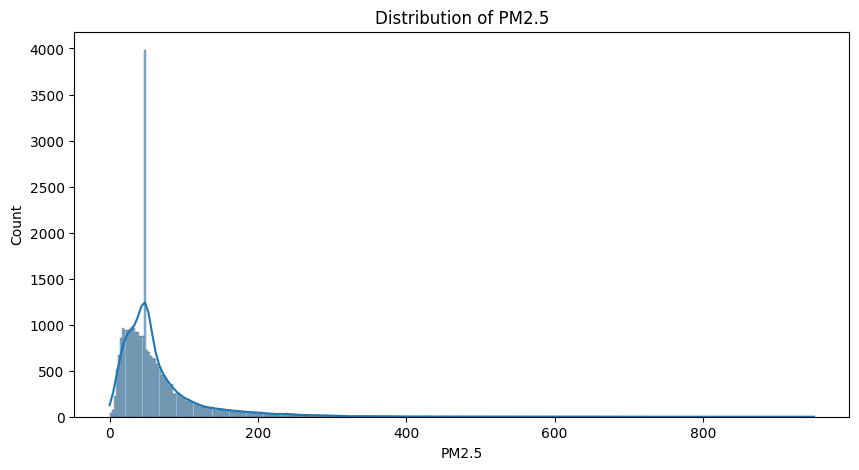

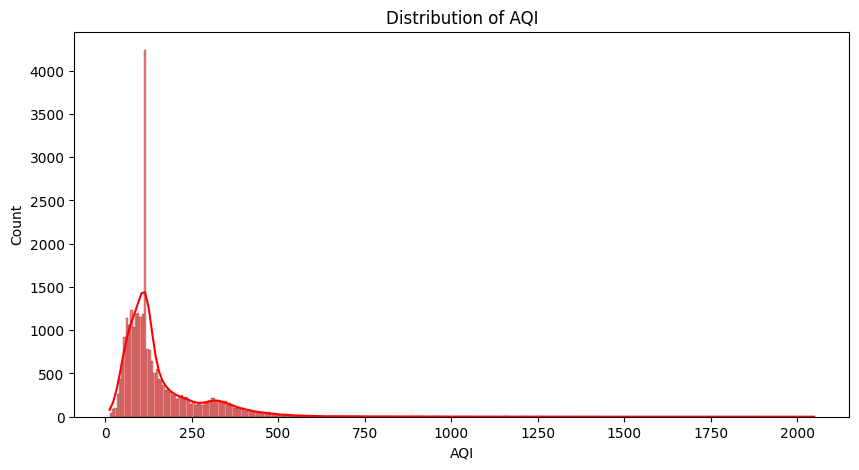

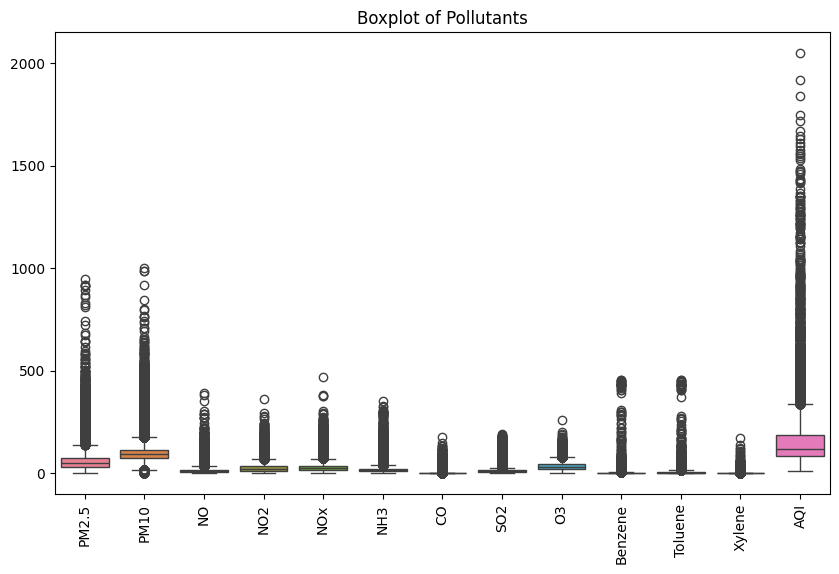

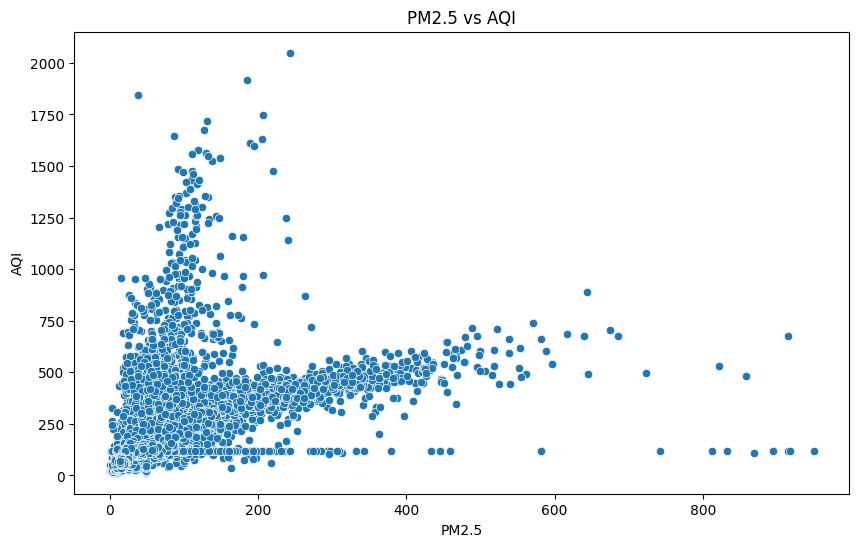

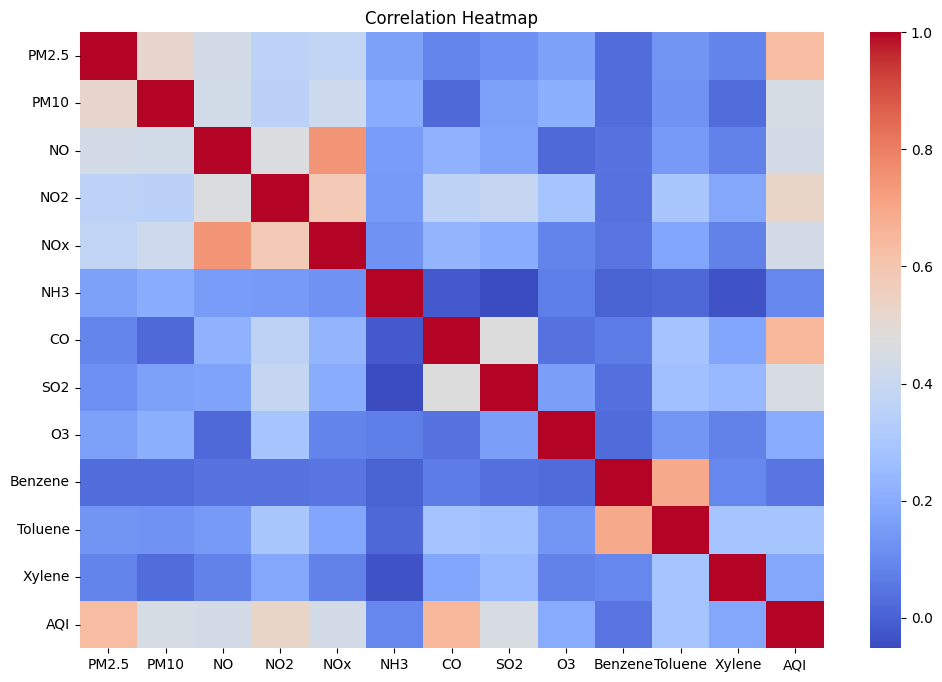

In [ ]:
#histplot for Distribution of PM2.5 and AQI
plt.figure(figsize=(10,5))
sns.histplot(df["PM2.5"], kde=True)
plt.title("Distribution of PM2.5")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df["AQI"], kde=True, color="red")
plt.title("Distribution of AQI")
plt.show()
#Boxplot PM2.5 vs AQI
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Pollutants")
plt.show()
#scatterplot for PM2.5 vs AQI
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["PM2.5"], y=df["AQI"])
plt.title("PM2.5 vs AQI")
plt.show()
#Heatmao for Correlation
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Insights from Exploratory Analysis

The exploratory analysis reveals that PM2.5 and PM10 exhibit strong positive correlations with AQI, confirming their dominant influence on overall air quality classification. Several gaseous pollutants also show moderate correlations, suggesting combined effects rather than isolated contributors.

The presence of outliers in certain pollutant distributions highlights the episodic nature of air pollution events, such as industrial emissions or seasonal crop burning. These findings reinforce the importance of using robust machine learning models capable of handling non-linear relationships and variability within the data.


## 6. Feature Selection and Dataset Splitting

Feature selection involves choosing the most relevant variables that contribute to predicting the target variable. In this project, pollutant concentration levels are selected as input features, while AQI is used as the target variable.

The dataset is split into training and testing subsets using an 80:20 ratio. This approach allows the model to learn patterns from the training data while being evaluated on unseen data to assess generalisation performance.




In [ ]:
features = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3',
            'Benzene','Toluene','Xylene']

X = df[features]
y = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 7. Machine Learning Model Development

Multiple machine learning models are trained and evaluated to identify the most suitable approach for predicting AQI values. Both linear and non-linear models are considered to compare performance across different modelling techniques.

Evaluating multiple models allows for a more robust assessment and helps avoid over-reliance on a single approach.





In [ ]:
#TRAIN WITH SOME MODELS + THERE COMPARISON
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42),
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))

    results.append([name, r2, mae, rmse])




### Model Performance Evaluation

The performance of each model is evaluated using R², Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). These metrics provide complementary perspectives on model accuracy and error magnitude.

Comparing results across models highlights the strengths and limitations of each approach and supports evidence-based model selection.


In [ ]:
#Checking different ML models
results_df = pd.DataFrame(results, columns=["Model", "R2", "MAE", "RMSE"])
results_df

,Model,R2,MAE,RMSE
0,Linear Regression,0.821689,31.850672,58.687455
1,Ridge Regression,0.821689,31.850682,58.687471
2,Lasso Regression,0.821689,31.850673,58.687478
3,Random Forest,0.882638,21.542753,47.612298


### Discussion of Model Behaviour

Linear models such as Linear Regression, Ridge, and Lasso provide a baseline understanding of pollutant–AQI relationships and offer high interpretability. However, their performance may be limited when relationships between variables are non-linear or involve complex interactions.

The Random Forest model, being an ensemble-based non-linear approach, is better suited to capturing complex patterns within the data. Its ability to aggregate multiple decision trees allows it to handle feature interactions and outliers more effectively, which is particularly beneficial for environmental datasets.


### Visual Model Comparison

A visual comparison of R² scores provides an intuitive understanding of model performance differences. This plot highlights which model best captures the relationship between pollutant concentrations and AQI.




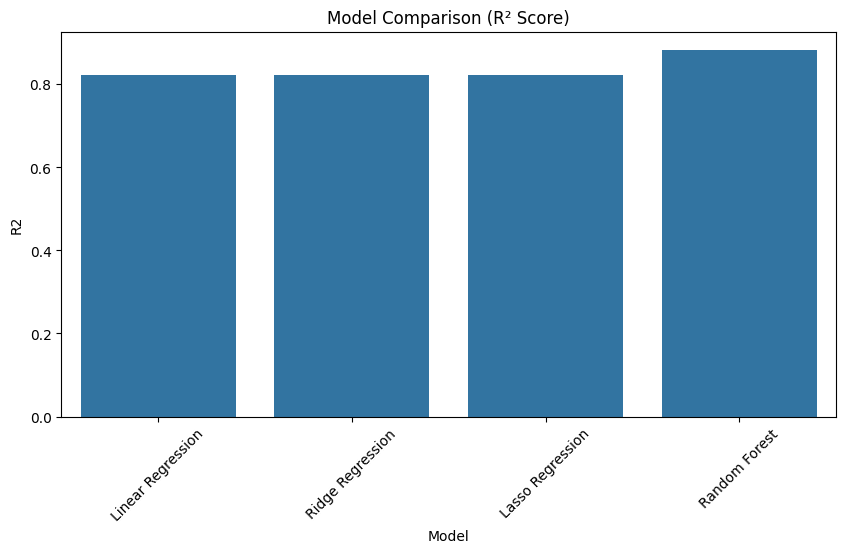

In [ ]:

#MODEL COMPARISON PLOT FOR DIFERRENT ALGORITHM/MODEL
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x="Model", y="R2")
plt.title("Model Comparison (R² Score)")
plt.xticks(rotation=45)
plt.show()


## 8. Model Selection and Persistence

The model with the highest R² score is selected as the best performing model. Retraining this model on the full dataset ensures that it benefits from all available information before being saved.

Persisting the trained model allows it to be reused for future predictions or integrated into an application without retraining.



In [ ]:
best_model_name = results_df.sort_values(by="R2", ascending=False).iloc[0, 0]
best_model = models[best_model_name]

print("BEST MODEL:", best_model_name)

# Retrain on full data
best_model.fit(X, y)

joblib.dump(best_model, "aqi_model.pkl")

print("Model saved is aqi_model.pkl")


BEST MODEL: Random Forest
Model saved → aqi_model.pkl


### Limitations and Ethical Considerations

Despite the strengths of the analytical approach, several limitations must be acknowledged. The dataset does not incorporate meteorological variables such as temperature, humidity, or wind speed, which are known to influence pollutant dispersion. Additionally, spatial granularity is limited by the available monitoring stations.

From an ethical perspective, predictive air quality systems must be communicated responsibly to avoid public misinterpretation or panic. Models should be viewed as decision-support tools rather than definitive predictors, and transparency in methodology is essential when such systems are deployed in real-world settings.


## 9. Conclusion and Reflection

This project demonstrates the complete development of a data-driven solution for analysing and predicting air quality. Through effective data handling, exploratory analysis, machine learning, and model evaluation, meaningful insights into air pollution patterns were obtained.

While the results are informative, limitations exist due to data quality, missing values, and the absence of external factors such as weather conditions. Future work could integrate meteorological data and advanced deep learning models to improve predictive accuracy.

Overall, this assessment strengthened practical skills in Python programming, data analysis, machine learning, and software engineering practices, aligning closely with the learning outcomes of the CMP7005 module.


## 10. Application Development (GUI)

To satisfy the application development requirement of this assessment, a multipage graphical user interface (GUI) was developed using the Streamlit framework. Streamlit was selected due to its suitability for rapid prototyping of data-driven applications using Python, as well as its ability to integrate machine learning models into interactive user interfaces.

The purpose of the application is to allow users to explore the air quality dataset, visualise pollutant trends, and generate AQI predictions using the trained machine learning model. The application is designed to be modular, reusable, and easy to navigate, reflecting good software engineering practices.




## 11. Application Architecture and Design

The application follows a modular multipage architecture, where each major functionality is implemented as a separate page. This design improves maintainability, readability, and scalability of the software.

The application consists of the following components:

- **Main Application File (`app.py`)**  
  Acts as the entry point and provides overall navigation and layout.

- **Data Overview Page**  
  Displays dataset structure, sample records, column descriptions, and summary statistics.

- **Exploratory Data Analysis (EDA) Page**  
  Provides interactive visualisations such as pollutant distributions, correlation heatmaps, and AQI trends.

- **Modelling and Prediction Page**  
  Loads the trained Random Forest model and allows users to input pollutant values to generate AQI predictions.

The trained model is loaded from a serialized file (`aqi_model.pkl`) using Joblib, ensuring separation between model training and application deployment.


### 11.1 Application Pages Description

**Data Overview Page**  
This page provides a high-level summary of the dataset, including the number of records, number of features, data types, and missing value information. Sample records and descriptive statistics are displayed to support initial data understanding.

**Exploratory Data Analysis Page**  
This page allows users to interactively explore the dataset through visualisations such as histograms, scatter plots, and correlation heatmaps. Dropdown selectors enable filtering by pollutant or city to support focused analysis.

**Modelling and Prediction Page**  
This page enables users to enter pollutant concentration values and obtain a predicted AQI value using the trained Random Forest model. This demonstrates the integration of machine learning into a practical software application.


### 11.2 Graphical User Interface Screenshots

The following screenshots demonstrate the functionality of the developed Streamlit application:

- Main application landing page  
- Data Overview page  
- Exploratory Data Analysis page  
- AQI Prediction page  

These screenshots provide evidence of a fully functional multipage GUI application as required by the assessment brief.


### 11.2 Graphical User Interface Screenshots

The following screenshots demonstrate the functionality of the developed Streamlit application:

- Main application landing page  
- Data Overview page  
- Exploratory Data Analysis page  
- AQI Prediction page  

These screenshots provide evidence of a fully functional multipage GUI application as required by the assessment brief.


## 12. Version Control and Project Management

GitHub was used for version control throughout the development of this project to manage code changes and maintain a clear development history. The repository was structured to separate data analysis, machine learning, and application components.

Regular commits were made with descriptive messages to document incremental progress, including data preprocessing, exploratory analysis, model development, and GUI implementation. This approach supports reproducibility, collaboration, and professional software development practices.


### 12.1 GitHub Repository Evidence

The following screenshots provide evidence of effective version control usage:

- GitHub repository file and folder structure  
- Commit history showing descriptive and incremental commits  

Access to the GitHub repository was provided to the module leader as required.


## 13. AI Use Declaration

***This assignment was completed by Mohsina Zaman Mim. Artificial intelligence tools were used only for learning support, planning guidance, and clarification of concepts. All code, analysis, interpretation, and written content were produced independently, rewritten in the author’s own words, and fully understood by the Mohsina Zaman Mim.***
